In [4]:
from web3 import Web3
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
K = 20
eth_reward = 2

start = 8961400 - 1000*(K-1)
finish = 8961400 - 1000*(K-2)
print('starting block:', start)
print('final block:', finish)

absolute_fee = []
relative_fee = []
block_number = []
contracts_number =[]
transactions_number = []

def to_eth(weis):
    return weis * 10**(-18)

def block_fee(block):
    sum_fee = 0
    contracts = 0
    for tr in block.transactions:
        sum_fee += tr.gasPrice * web3.eth.getTransactionReceipt(tr.hash).gasUsed
        if tr.input != '0x':
            contracts += 1
    return to_eth(sum_fee), contracts

def block_reward(block, fee_value):
    return eth_reward + fee_value + len(block.uncles) / 32


starting block: 8961020
final block: 8961040


In [6]:
web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/eceab8676cd0428a900d6ab0bafcb463"))
for block_n in range(start, finish+1):
    block = web3.eth.getBlock(block_n, True)
    total_fee, contracts_n = block_fee(block)
    number = block.number
    reward = block_reward(block, total_fee)
    absolute_fee.append(total_fee)
    relative_fee.append(total_fee * 100 / reward)
    block_number.append(number)
    contracts_number.append(contracts_n)
    transactions_number.append(len(block.transactions))

In [7]:
Mx = np.mean(absolute_fee)
median = np.median(absolute_fee)
data_range = np.max(absolute_fee) - np.min(absolute_fee)
Dx = np.var(absolute_fee)
Sx = math.sqrt(Dx)
smart = np.sum(contracts_number)
output_data = {'Математическое ожидание:': Mx,
               'Дисперсия:': Dx,
               'Среднеквадратичное отклонение:': Sx,
               'Разброс:': data_range,
               'Медиана:': median,
               'Кол-во смарт контрактов': smart}
for k, v in output_data.items():
    print(k, ': ', round(v, 6))

Математическое ожидание: :  0.085717
Дисперсия: :  0.004598
Среднеквадратичное отклонение: :  0.067805
Разброс: :  0.227287
Медиана: :  0.061015
Кол-во смарт контрактов :  2074


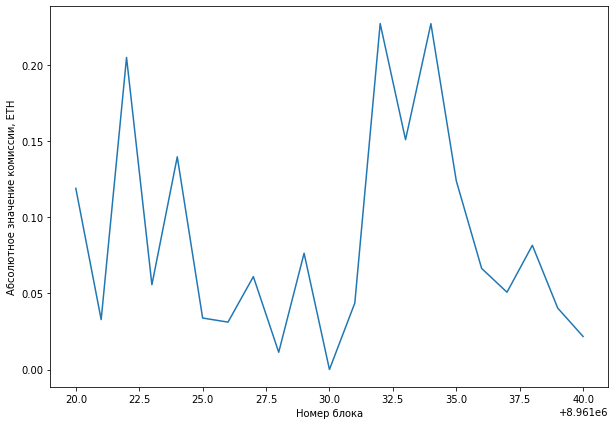

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(block_number, absolute_fee)
plt.xlabel('Номер блока')
plt.ylabel('Абсолютное значение комиссии, ETH')
plt.show()

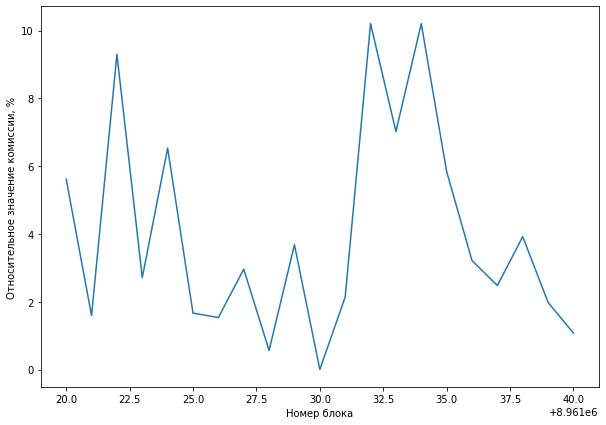

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(block_number, relative_fee)
plt.xlabel('Номер блока')
plt.ylabel('Относительное значение комиссии, %')
plt.show()

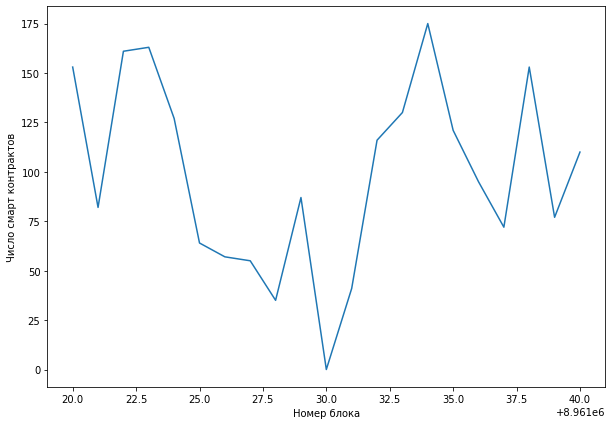

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(block_number, contracts_number)
plt.xlabel('Номер блока')
plt.ylabel('Число смарт контрактов')
plt.show()